In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

from importlib.util import find_spec
if find_spec("qml_hep_lhc") is None:
    import sys
    sys.path.append('..')

In [80]:
from qml_hep_lhc.data import ElectronPhoton, MNIST, QuarkGluon
import argparse
from sklearn.decomposition import PCA
import numpy as np
from skimage.filters import threshold_local
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, normalize
from tensorflow import image

In [3]:
def display_data(x,y,cmap = 'viridis'):
    fig = plt.figure(figsize=(10, 7))
    rows = 2
    columns = 2
    index = [np.where(y == 1)[0], np.where(y == 0)[0]] # 0, 1
    for i in range(columns):
        fig.add_subplot(rows, columns,i+1)
        plt.imshow(np.mean(x[index[i],:,:,0], axis = 0), cmap=cmap)
        plt.title(i)
        plt.colorbar()

In [4]:
def to_numpy(data,split='train'):
    if split == 'train':
        ds = data.train_ds
    elif split == 'val':
        ds = data.val_ds
    else:
        ds = data.test_ds
    ds = ds.unbatch()
    ds = ds.as_numpy_iterator()
    ds = [element for element in ds]
    x =  np.array([ x for x,y in ds])
    y =  np.array([ y for x,y in ds])
    return x,y

## Mnist

Processed 1
DATA DIR /home/gopald/Documents/qml-hep-lhc/datasets/processed
Binarizing data...
shape before:  (3000, 28, 28, 1)
shape after:  (600, 28, 28, 1)
Binarizing data...
shape before:  (1000, 28, 28, 1)
shape after:  (200, 28, 28, 1)


2022-07-20 12:08:31.236666: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-20 12:08:31.236713: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bhagvada): /proc/driver/nvidia/version does not exist
2022-07-20 12:08:31.237164: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Dataset :MNIST
╒════════╤══════════════════╤══════════════════╤══════════════════╤═════════════╕
│ Data   │ Train size       │ Val size         │ Test size        │ Dims        │
╞════════╪══════════════════╪══════════════════╪══════════════════╪═════════════╡
│ X      │ (480, 28, 28, 1) │ (120, 28, 28, 1) │ (200, 28, 28, 1) │ (28, 28, 1) │
├────────┼──────────────────┼──────────────────┼──────────────────┼─────────────┤
│ y      │ (480,)           │ (120,)           │ (200,)           │ (1,)        │
╘════════╧══════════════════╧══════════════════╧══════════════════╧═════════════╛

╒══════════════╤═══════╤═══════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │   Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪═══════╪════════╪═══════╪══════════════════════════╡
│ Train Images │     0 │   255 │  32.36 │ 78.23 │ [240, 240]               │
├──────────────┼───────┼───────┼────────┼───────┼──────────────────────────┤
│ Val Images   │     0 │

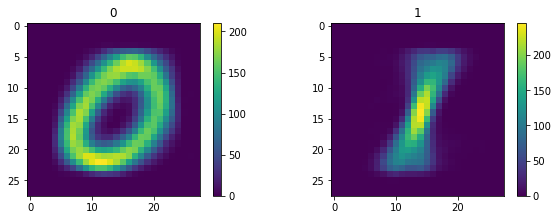

In [6]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.processed = 1

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
x,y = to_numpy(data)
display_data(x,y)

Processed 1
DATA DIR /home/gopald/Documents/qml-hep-lhc/datasets/processed
Binarizing data...
shape before:  (3000, 28, 28, 1)
shape after:  (600, 28, 28, 1)
Binarizing data...
shape before:  (1000, 28, 28, 1)
shape after:  (200, 28, 28, 1)
Center cropping...
Center cropping...

Dataset :MNIST
╒════════╤══════════════════╤══════════════════╤══════════════════╤═════════════╕
│ Data   │ Train size       │ Val size         │ Test size        │ Dims        │
╞════════╪══════════════════╪══════════════════╪══════════════════╪═════════════╡
│ X      │ (480, 20, 20, 1) │ (120, 20, 20, 1) │ (200, 20, 20, 1) │ (20, 20, 1) │
├────────┼──────────────────┼──────────────────┼──────────────────┼─────────────┤
│ y      │ (480,)           │ (120,)           │ (200,)           │ (1,)        │
╘════════╧══════════════════╧══════════════════╧══════════════════╧═════════════╛

╒══════════════╤═══════╤═══════╤════════╤════════╤══════════════════════════╕
│ Type         │   Min │   Max │   Mean │    Std │ S

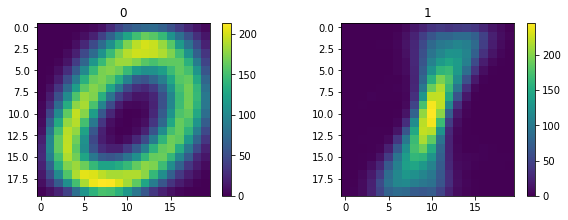

In [7]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.center_crop = 0.7
args.processed = 1

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
x,y = to_numpy(data)
display_data(x,y)

In [8]:
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(480, 400)

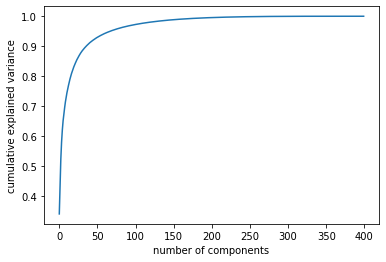

In [9]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Processed 1
DATA DIR /home/gopald/Documents/qml-hep-lhc/datasets/processed
Binarizing data...
shape before:  (3000, 28, 28, 1)
shape after:  (600, 28, 28, 1)
Binarizing data...
shape before:  (1000, 28, 28, 1)
shape after:  (200, 28, 28, 1)
Center cropping...
Center cropping...
Performing PCA on data...
Cumulative sum on train : 96.87461051616518
Cumulative sum on test: 96.87461051616518

Dataset :MNIST
╒════════╤══════════════════╤══════════════════╤══════════════════╤═════════════╕
│ Data   │ Train size       │ Val size         │ Test size        │ Dims        │
╞════════╪══════════════════╪══════════════════╪══════════════════╪═════════════╡
│ X      │ (480, 10, 10, 1) │ (120, 10, 10, 1) │ (200, 10, 10, 1) │ (10, 10, 1) │
├────────┼──────────────────┼──────────────────┼──────────────────┼─────────────┤
│ y      │ (480,)           │ (120,)           │ (200,)           │ (1,)        │
╘════════╧══════════════════╧══════════════════╧══════════════════╧═════════════╛

╒══════════════╤══

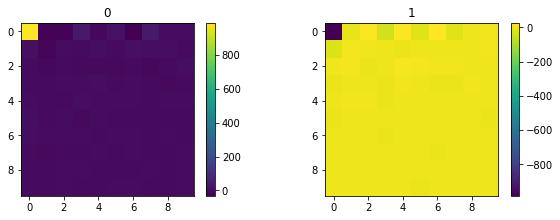

In [11]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.center_crop = 0.7
args.pca = 100
args.processed = 1

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
x,y = to_numpy(data)
display_data(x,y)

Binarizing data...
Binarizing data...
Center cropping...
Center cropping...
Resizing data...
Resizing data...

Dataset :MNIST
╒════════╤════════════════╤════════════════╤════════════════╤═══════════╕
│ Data   │ Train size     │ Val size       │ Test size      │ Dims      │
╞════════╪════════════════╪════════════════╪════════════════╪═══════════╡
│ X      │ (480, 8, 8, 1) │ (120, 8, 8, 1) │ (200, 8, 8, 1) │ (8, 8, 1) │
├────────┼────────────────┼────────────────┼────────────────┼───────────┤
│ y      │ (480,)         │ (120,)         │ (200,)         │ (1,)      │
╘════════╧════════════════╧════════════════╧════════════════╧═══════════╛

╒══════════════╤═══════╤════════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │    Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪════════╪════════╪═══════╪══════════════════════════╡
│ Train Images │     0 │ 255    │  63.41 │ 93.18 │ [240, 240]               │
├──────────────┼───────┼────────┼────────┼─

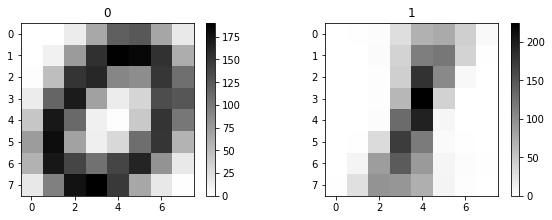

In [117]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.center_crop = 0.7
args.resize = [8,8]
args.processed = 1

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
x,y = to_numpy(data)
display_data(x,y,cmap='binary')

## Electron Photon

Normalizing data...

Dataset :Electron Photon med
╒════════╤═══════════════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Val size          │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (7200, 32, 32, 1) │ (1800, 32, 32, 1) │ (1000, 32, 32, 1) │ (32, 32, 1) │
├────────┼───────────────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (7200,)           │ (1800,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═══════════════════╧═════════════╛

╒══════════════╤═══════╤═══════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │   Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪═══════╪════════╪═══════╪══════════════════════════╡
│ Train Images │     0 │     1 │      0 │  0.03 │ [3600, 3600]             │
├──────────────┼───────┼───────┼────────┼─────

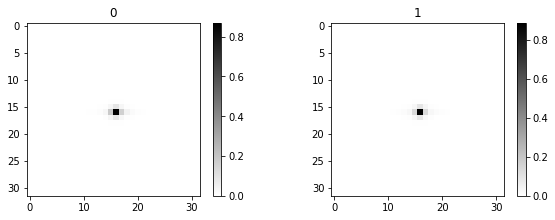

In [42]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.normalize = 1
# args.center_crop = 0.3

data = ElectronPhoton(args)
data.prepare_data()
data.setup()
print(data)
x, y = to_numpy(data)
display_data(x,y,cmap='binary')

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
scaler = StandardScaler()

x = x.reshape(-1,np.prod(data.config()['input_dims']))
x_t = pt.fit_transform(x)
x_t = scaler.fit_transform(x_t)

x_t = x_t.reshape([-1] + list(data.config()['input_dims']))
x =  x.reshape([-1] + list(data.config()['input_dims']))

/home/gopald/Documents/qml-hep-lhc/qenv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


/home/gopald/Documents/qml-hep-lhc/qenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


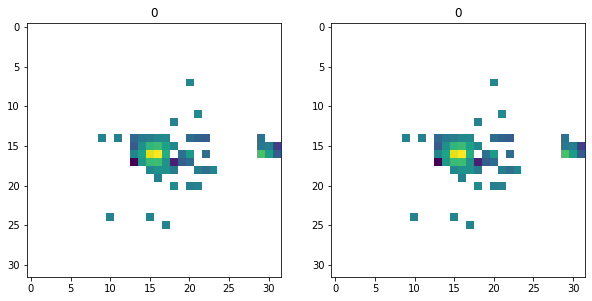

In [112]:
n = np.random.randint(low = 0,high = 7200)
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    if i: 
        plt.imshow(x[n,:,:,0], norm=LogNorm())
    else:
        plt.imshow(np.log(x[n,:,:,0]))
    plt.title(y[n])
    

In [40]:
print(a.max(),a.min())
print(x.max(),x.min())
print(np.log(a).max(), np.log(a).min(), np.log(a).mean())

0.99806 0.0
0.99806 0.0
-0.0019418963 -inf -inf


/home/gopald/Documents/qml-hep-lhc/qenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [159]:
# x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(7200, 1024)

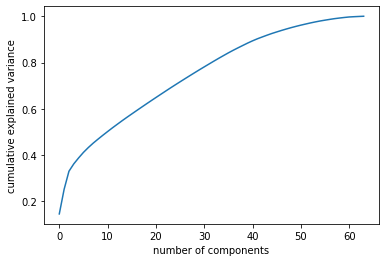

In [45]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Center cropping...
Center cropping...
Performing PCA on data...
Cumulative sum on train : 99.634186
Cumulative sum on test: 99.634186
Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 4, 4, 1) │ (1000, 4, 4, 1) │ (4, 4, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -0.69
Max: 0.81
Mean: 0.00
Std: 0.08
Train labels stats
Min: 0.00
Max: 1.00



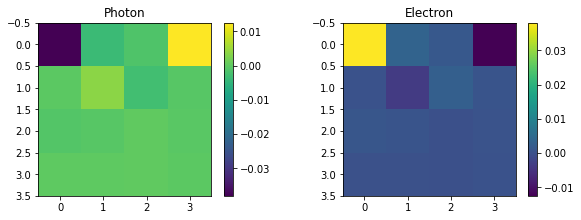

In [64]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.pca = 16

data = ElectronPhoton(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Center cropping...
Center cropping...
Performing graph convolution...
Performing graph convolution...
Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.79
Mean: 0.88
Std: 0.20
Train labels stats
Min: 0.00
Max: 1.00



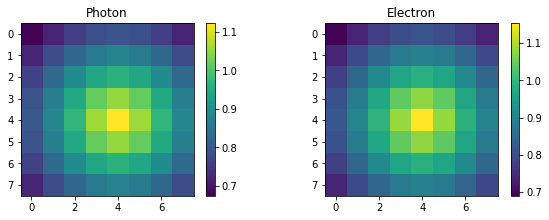

In [65]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.graph_conv = 1

data = ElectronPhoton(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

## Quark Gluon

Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 39, 39, 1) │ (1000, 39, 39, 1) │ (39, 39, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 7.09
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00



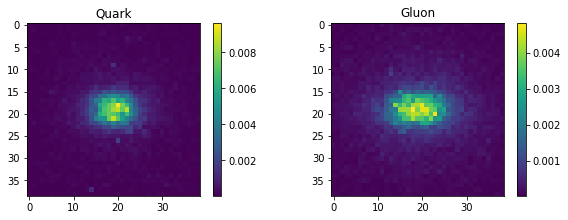

In [71]:
args = argparse.Namespace()

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

In [72]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 1521)

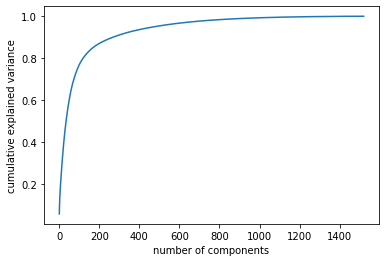

In [73]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Performing PCA on data...
Cumulative sum on train : 89.45578
Cumulative sum on test: 89.45578
Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 16, 16, 1) │ (1000, 16, 16, 1) │ (16, 16, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: -0.79
Max: 9.86
Mean: 0.00
Std: 0.03
Train labels stats
Min: 0.00
Max: 1.00



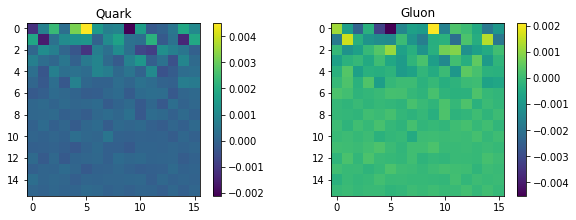

In [75]:
args = argparse.Namespace()
args.pca = 256

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Dataset :Quark Gluon
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.00
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00



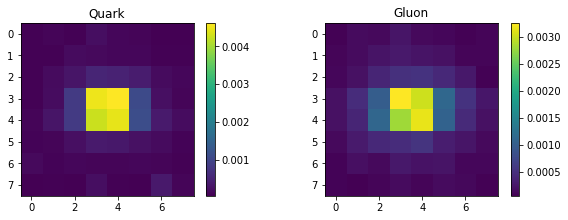

In [77]:
args = argparse.Namespace()
args.resize = [8,8]

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Performing graph convolution...
Performing graph convolution...
Dataset :Quark Gluon
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.01
Mean: 0.02
Std: 0.03
Train labels stats
Min: 0.00
Max: 1.00



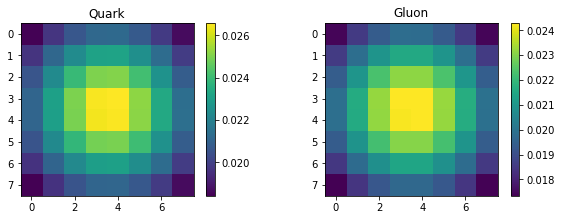

In [80]:
args = argparse.Namespace()
args.resize = [8,8]
args.graph_conv = 1

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 10, 10, 1) │ (1000, 10, 10, 1) │ (10, 10, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 1.37
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00



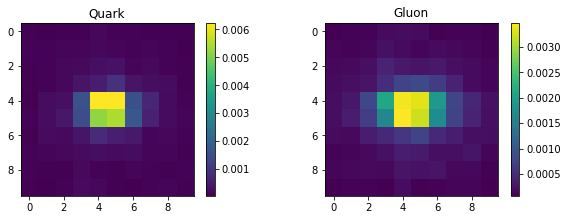

In [81]:
args = argparse.Namespace()
args.resize = [10,10]

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Performing graph convolution...
Performing graph convolution...
Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 10, 10, 1) │ (1000, 10, 10, 1) │ (10, 10, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 1.38
Mean: 0.03
Std: 0.06
Train labels stats
Min: 0.00
Max: 1.00



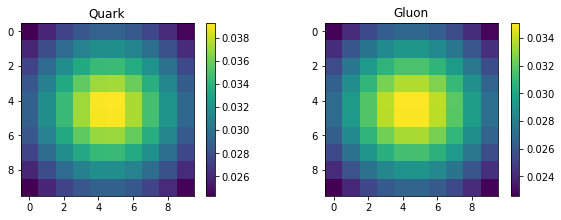

In [82]:
args = argparse.Namespace()
args.resize = [10,10]
args.graph_conv = 1

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

In [ ]:
ss